In [1]:
import pandas as pd
from numpy.ma.extras import average

In [2]:
import numpy as np

In [3]:
# Einlesen der Datei
matches = pd.read_csv("matches.csv")

In [4]:
matches

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,ManchesterCity
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,36,2024-04-24,20:00,Premier League,Matchweek 29,Wed,Away,L,2,4,...,Match Report,NaN,10.0,4.0,17.8,1.0,0,0,2024,SheffieldUnited
756,37,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Away,L,1,5,...,Match Report,NaN,15.0,4.0,13.5,0.0,0,0,2024,SheffieldUnited
757,38,2024-05-04,15:00,Premier League,Matchweek 36,Sat,Home,L,1,3,...,Match Report,NaN,16.0,4.0,18.0,0.0,1,1,2024,SheffieldUnited
758,39,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Away,L,0,1,...,Match Report,NaN,13.0,1.0,21.0,0.0,0,0,2024,SheffieldUnited


In [5]:
#Umbenennung des Datensatzes von "Nott'ham Forrest" zu "Nottingham Forrest"
teams_rename = {
    "Nott'ham Forest": "Nottingham Forest",
    "ManchesterCity": "Manchester City",
    "SheffieldUnited": "Sheffield",
    "Sheffield Utd": "Sheffield",
    "LutonTown": "Luton Town",
    "BrightonandHoveAlbion": "Brighton",
    "WolverhamptonWanderers": "Wolverhampton",
    "CrystalPalace": "Crystal Palace",
    "WestHamUnited": "West Ham",
    "ManchesterUnited": "Manchester United",
    "Manchester Utd": "Manchester United",
    "NewcastleUnited": "Newcastle United",
    "Newcastle Utd": "Newcastle United",
    "TottenhamHotspur": "Tottenham",
    "AstonVilla": "Aston Villa",
    "NottinghamForest": "Nottingham Forest",
    "Wolves": "Wolverhampton"
}

matches["Team"] = matches["Team"].replace(teams_rename)
matches["Opponent"] = matches["Opponent"].replace(teams_rename)

''' Auftrennung des Dataframes in zwei Separate, da jedes Spiel doppelt gewertet wird. (einmal aus Sicht der Heimmannschaft und einmal aus Sicht der Gäsemannschaft). Ziel ist es einen Joined Table zu erstellen, der alle notwendigen Informationen enthält und in dem jedes Spiel nur noch einmal enthalten ist. '''
matches_home = matches[matches.Venue == "Home"].copy()
matches_away = matches[matches.Venue == "Away"].copy()

# Erstellung einer eindeutigen Spiel ID, um sie fürs Mergen verwenden zu können.
matches_home["ID"] = matches_home["Date"] + " " + matches_home["Time"] + " " + matches_home["Team"] + " " + matches_home["Opponent"]
matches_away["ID"] = matches_away["Date"] + " " + matches_away["Time"] + " " + matches_away["Opponent"] + " " + matches_away["Team"]

# Zusammenführen der Daten
matches_cleaned = pd.merge(matches_home, matches_away, on="ID", suffixes=("_Home", "_Away"))

# Auswahl der relevanten Spalten
matches_cleaned = matches_cleaned[["ID", "Date_Home", "Time_Home", "Round_Home", "Day_Home", "Team_Home", "Team_Away", "GF_Home", "GA_Home", "xG_Home", "xGA_Home", "Poss_Home", "Formation_Home", "Poss_Away", "Formation_Away", "Sh_Home", "SoT_Home", "Dist_Home", "FK_Home", "PK_Home", "PKatt_Home", "Sh_Away", "SoT_Away", "Dist_Away", "FK_Away", "PK_Away", "PKatt_Away", "Attendance_Home", "Captain_Home", "Captain_Away", "Referee_Home"]]


# Umbenennen der Spalten
matches_columns_rename = {
    "Date_Home": "Date",
    "Time_Home": "Time",
    "Round_Home": "Round",
    "Day_Home": "Day",
    "GF_Home": "Goals_Home",
    "GA_Home": "Goals_Away",
    "xGA_Home": "xG_Away",
    "Attendance_Home": "Attendance",
    "Referee_Home": "Referee",
    "Sh_Home": "Shots_Home",
    "Dist_Home": "AVG_Dist_Home",
    "Sh_Away": "Shots_Away",
    "Dist_Away": "AVG_Dist_Away",
}
matches_cleaned = matches_cleaned.rename(columns=matches_columns_rename)
matches_cleaned

,ID,Date,Time,Round,Day,Team_Home,Team_Away,Goals_Home,Goals_Away,xG_Home,...,Shots_Away,SoT_Away,AVG_Dist_Away,FK_Away,PK_Away,PKatt_Away,Attendance,Captain_Home,Captain_Away,Referee
0,2023-08-19 20:00 Manchester City Newcastle United,2023-08-19,20:00,Matchweek 2,Sat,Manchester City,Newcastle United,1,0,1.0,...,7.0,1.0,20.3,0.0,0,0,53419.0,Kyle Walker,Kieran Trippier,Robert Jones
1,2023-09-02 15:00 Manchester City Fulham,2023-09-02,15:00,Matchweek 4,Sat,Manchester City,Fulham,5,1,2.2,...,6.0,4.0,11.4,0.0,0,0,52899.0,Kyle Walker,Tom Cairney,Michael Oliver
2,2023-09-23 15:00 Manchester City Nottingham Fo...,2023-09-23,15:00,Matchweek 6,Sat,Manchester City,Nottingham Forest,2,0,1.3,...,10.0,3.0,17.8,1.0,0,0,53413.0,Kyle Walker,Serge Aurier,Anthony Taylor
3,2023-10-21 15:00 Manchester City Brighton,2023-10-21,15:00,Matchweek 9,Sat,Manchester City,Brighton,2,1,0.8,...,5.0,3.0,12.1,0.0,0,0,53466.0,Kyle Walker,Lewis Dunk,Robert Jones
4,2023-11-04 15:00 Manchester City Bournemouth,2023-11-04,15:00,Matchweek 11,Sat,Manchester City,Bournemouth,6,1,1.9,...,5.0,1.0,11.4,0.0,0,0,53358.0,Kyle Walker,Lloyd Kelly,Craig Pawson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2024-03-30 15:00 Sheffield Fulham,2024-03-30,15:00,Matchweek 30,Sat,Sheffield,Fulham,3,3,1.9,...,24.0,9.0,17.6,0.0,0,0,30010.0,Jack Robinson,Bernd Leno,Tim Robinson
376,2024-04-07 17:30 Sheffield Chelsea,2024-04-07,17:30,Matchweek 32,Sun,Sheffield,Chelsea,2,2,1.4,...,6.0,3.0,18.5,0.0,0,0,28638.0,Jack Robinson,Conor Gallagher,Robert Jones
377,2024-04-20 15:00 Sheffield Burnley,2024-04-20,15:00,Matchweek 34,Sat,Sheffield,Burnley,1,4,2.4,...,16.0,9.0,16.0,0.0,0,0,28964.0,Oliver McBurnie,Josh Cullen,Andy Madley
378,2024-05-04 15:00 Sheffield Nottingham Forest,2024-05-04,15:00,Matchweek 36,Sat,Sheffield,Nottingham Forest,1,3,2.2,...,15.0,4.0,17.2,0.0,0,0,28516.0,Jack Robinson,Ryan Yates,Chris Kavanagh


In [6]:
def Abschlusstabelle(matches_cleaned):
    # Erstellen eines cleanen Dataframes mit ausschließlich den Informationen, die für eine Saisonasbschlusstabelle benötigt werden
    matches_analysis = matches_cleaned[["Team_Home","Team_Away","Goals_Home","Goals_Away"]].copy()
    matches_analysis["Difference"] = matches_analysis["Goals_Home"] - matches_analysis["Goals_Away"]
    matches_analysis["Points_Home"] = matches_analysis["Difference"].apply(lambda x: 3 if x > 0 else (1 if x == 0 else 0))
    matches_analysis["Points_Away"] = matches_analysis["Difference"].apply(lambda x: 3 if x < 0 else (1 if x == 0 else 0))
    matches_analysis["Result_Home"] = matches_analysis["Difference"].apply(lambda x: "W" if x > 0 else ("D" if x == 0 else "L"))
    matches_analysis["Results_Away"] = matches_analysis["Difference"].apply(lambda x: "W" if x < 0 else ("D" if x == 0 else "L"))

    # Weiterführung der Auswertung für die Heimmannschaften
    home_stats = matches_analysis.groupby("Team_Home").agg(
        Games_Home=("Goals_Home","count"),
        Wins_Home=("Points_Home",lambda x: (x==3).sum()),
        Draws_Home=("Points_Home", lambda x: (x==1).sum()),
        Losses_Home=("Points_Home",lambda x: (x==0).sum()),
        GF_Home=("Goals_Home", "sum"),
        GA_Home=("Goals_Away", "sum"),
        Points_Home=("Points_Home", "sum"),
    ).rename_axis("Team").reset_index()

    #Gleiche Auswertung durchführen für die Auswärtsmannschaft
    away_stats = matches_analysis.groupby("Team_Away").agg(
        Games_Away=("Goals_Away", "count"),
        Wins_Away=("Points_Away", lambda x: (x==3).sum()),
        Draws_Away=("Points_Away", lambda x: (x==1).sum()),
        Losses_Away=("Points_Away",lambda x: (x==0).sum()),
        GF_Away=("Goals_Away", "sum"),
        GA_Away=("Goals_Home", "sum"),
        Points_Away=("Points_Away", "sum"),
    ).rename_axis("Team").reset_index()

    #Zusammenführen der beiden Statistiken
    tabelle = pd.merge(home_stats, away_stats, on="Team", how="outer")

    #Bereinigen und erstellen einer Abschlusstabelle
    tabelle["Games"] = tabelle["Games_Home"] + tabelle["Games_Away"]
    tabelle["Wins"] = tabelle["Wins_Home"] + tabelle["Wins_Away"]
    tabelle["Draws"] = tabelle["Draws_Home"] + tabelle["Draws_Away"]
    tabelle["Losses"] = tabelle["Losses_Home"] + tabelle["Losses_Away"]
    tabelle["Goals"] = tabelle["GF_Home"] + tabelle["GF_Away"]
    tabelle["Goals_Against"] = tabelle["GA_Home"] + tabelle["GA_Away"]
    tabelle["GD"] = tabelle["Goals"] - tabelle["Goals_Against"]
    tabelle["Points"] = tabelle["Points_Home"] + tabelle["Points_Away"]

    #Auswahl der relevanten Spalten
    tabelle.sort_values("Points", ascending=False, inplace=True)
    tabelle = tabelle[["Team","Games","Wins","Draws","Losses","Goals","Goals_Against", "GD","Points"]]

    return tabelle

finale_tabelle = Abschlusstabelle(matches_cleaned)
finale_tabelle = finale_tabelle.reset_index(drop=True)
finale_tabelle

,Team,Games,Wins,Draws,Losses,Goals,Goals_Against,GD,Points
0,Manchester City,38,28,7,3,96,34,62,91
1,Arsenal,38,28,5,5,91,29,62,89
2,Liverpool,38,24,10,4,86,41,45,82
3,Aston Villa,38,20,8,10,76,61,15,68
4,Tottenham,38,20,6,12,74,61,13,66
5,Chelsea,38,18,9,11,77,63,14,63
6,Manchester United,38,18,6,14,57,58,-1,60
7,Newcastle United,38,18,6,14,85,62,23,60
8,West Ham,38,14,10,14,60,74,-14,52
9,Crystal Palace,38,13,10,15,57,58,-1,49


In [7]:
# Als nächstes erstelle ich die gleiche Tabelle erneut, aber diese mal mit FOkus auf den xG Wert (den erwarteten Toren auf Basis der Chancen, die erspielt wurden)
def xG_Tabelle(matches_cleaned):
    # Erstellen eines cleanen Dataframes mit ausschließlich den Informationen, die für eine Saisonasbschlusstabelle benötigt werden
    matches_analysis = matches_cleaned[["Team_Home","Team_Away","xG_Home","xG_Away"]].copy()
    matches_analysis["Difference_xG"] = matches_analysis["xG_Home"] - matches_analysis["xG_Away"]
    matches_analysis["Points_Home"] = matches_analysis["Difference_xG"].apply(lambda x: 3 if x > 0 else (1 if x == 0 else 0))
    matches_analysis["Points_Away"] = matches_analysis["Difference_xG"].apply(lambda x: 3 if x < 0 else (1 if x == 0 else 0))
    matches_analysis["Result_Home"] = matches_analysis["Difference_xG"].apply(lambda x: "W" if x > 0 else ("D" if x == 0 else "L"))
    matches_analysis["Results_Away"] = matches_analysis["Difference_xG"].apply(lambda x: "W" if x < 0 else ("D" if x == 0 else "L"))

    # Weiterführung der Auswertung für die Heimmannschaften
    home_stats = matches_analysis.groupby("Team_Home").agg(
        Games_Home=("xG_Home","count"),
        Wins_Home=("Points_Home",lambda x: (x==3).sum()),
        Draws_Home=("Points_Home", lambda x: (x==1).sum()),
        Losses_Home=("Points_Home",lambda x: (x==0).sum()),
        GF_Home=("xG_Home", "sum"),
        GA_Home=("xG_Away", "sum"),
        Points_Home=("Points_Home", "sum"),
    ).rename_axis("Team").reset_index()

    away_stats = matches_analysis.groupby("Team_Away").agg(
        Games_Away=("xG_Away", "count"),
        Wins_Away=("Points_Away", lambda x: (x==3).sum()),
        Draws_Away=("Points_Away", lambda x: (x==1).sum()),
        Losses_Away=("Points_Away",lambda x: (x==0).sum()),
        GF_Away=("xG_Away", "sum"),
        GA_Away=("xG_Home", "sum"),
        Points_Away=("Points_Away", "sum"),
    ).rename_axis("Team").reset_index()

    #Zusammenführen der beiden Statistiken
    tabelle = pd.merge(home_stats, away_stats, on="Team", how="outer")

    #Bereinigen und erstellen einer Abschlusstabelle
    tabelle["Games"] = tabelle["Games_Home"] + tabelle["Games_Away"]
    tabelle["Wins"] = tabelle["Wins_Home"] + tabelle["Wins_Away"]
    tabelle["Draws"] = tabelle["Draws_Home"] + tabelle["Draws_Away"]
    tabelle["Losses"] = tabelle["Losses_Home"] + tabelle["Losses_Away"]
    tabelle["Goals"] = tabelle["GF_Home"] + tabelle["GF_Away"]
    tabelle["Goals_Against"] = tabelle["GA_Home"] + tabelle["GA_Away"]
    tabelle["GD"] = tabelle["Goals"] - tabelle["Goals_Against"]
    tabelle["Points"] = tabelle["Points_Home"] + tabelle["Points_Away"]

    #Auswahl der relevanten Spalten
    tabelle.sort_values("Points", ascending=False, inplace=True)
    tabelle = tabelle[["Team","Games","Wins","Draws","Losses","Goals","Goals_Against", "GD","Points"]]

    return tabelle

erwartete_tabelle = xG_Tabelle(matches_cleaned)
erwartete_tabelle = erwartete_tabelle.reset_index(drop=True)
erwartete_tabelle

,Team,Games,Wins,Draws,Losses,Goals,Goals_Against,GD,Points
0,Manchester City,38,32,2,4,80.6,35.4,45.2,98
1,Arsenal,38,31,0,7,76.3,27.8,48.5,93
2,Liverpool,38,30,1,7,87.8,45.8,42.0,91
3,Chelsea,38,25,2,11,74.5,58.3,16.2,77
4,Newcastle United,38,22,2,14,76.1,61.5,14.6,68
5,Everton,38,20,1,17,53.5,55.3,-1.8,61
6,Tottenham,38,20,1,17,68.0,63.5,4.5,61
7,Aston Villa,38,19,2,17,63.5,60.0,3.5,59
8,Bournemouth,38,19,1,18,56.0,58.1,-2.1,58
9,Brighton,38,17,4,17,56.6,55.7,0.9,55


In [8]:
#Während der Exploration ist mir aufgefallen, dass die meisten Spiele (46,05%) von Heimteams gewonnen wurden. Das ist eine interessante Statisik. Deshalb hier eine genaue Auswertung dafür.
def Wins_Home(matches_cleaned):
    matches_analysis = matches_cleaned[["Team_Home","Team_Away","Goals_Home","Goals_Away"]].copy()
    matches_analysis["Difference"] = matches_analysis["Goals_Home"] - matches_analysis["Goals_Away"]
    matches_analysis["Result_Home"] = matches_analysis["Difference"].apply(lambda x: "W" if x > 0 else ("D" if x == 0 else "L"))
    matches_analysis["Results_Away"] = matches_analysis["Difference"].apply(lambda x: "W" if x < 0 else ("D" if x == 0 else "L"))
    return matches_analysis["Result_Home"].value_counts(normalize=True).round(4)*100
Heimsiege = Wins_Home(matches_cleaned)
Heimsiege


Result_Home
W    46.05
L    32.37
D    21.58
Name: proportion, dtype: float64

In [9]:
import matplotlib.pyplot as plt

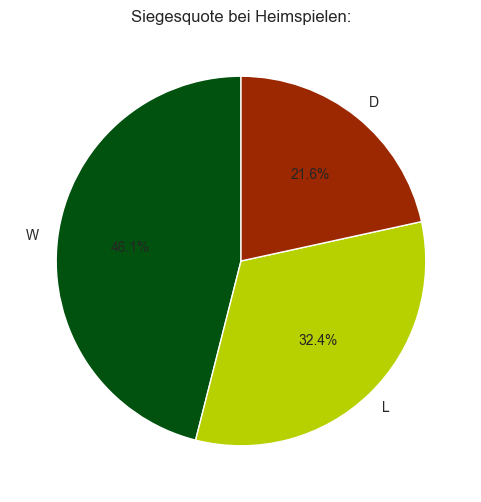

In [10]:
# Um es schöner zu gestalten, visualisiere ich es auch gleich
plt.figure(figsize = (6,6))
plt.pie(
    Heimsiege.values,
    labels = Heimsiege.index,
    autopct = "%1.1f%%",
    startangle = 90,
    colors = ("#00520E", "#B7D100", "#9B2800"),
)
plt.title("Siegesquote bei Heimspielen:")
plt.show()

In [11]:
# Im Zuge dessen interessiert mich auch, wie sich das auf die Tore auswirkt. Schießt die Heimmannschaft mehr Tore als die Auswärtsmannschaft?
def Goals_Home_and_Away(matches_cleaned):
    # Auswahl der Spalten
    matches_analysis = matches_cleaned[["Team_Home", "Goals_Home", "Goals_Away"]].copy()
    #Ausrechnen Durchschnitt
    avg_home_goals = np.average(matches_analysis["Goals_Home"])
    avg_away_goals = np.average(matches_analysis["Goals_Away"])

    average_goals_data = {
        "Home": avg_home_goals,
        "Away": avg_away_goals,
    }

    average_goals = pd.DataFrame(average_goals_data, index=["Average Goals"])
    average_goals = average_goals.transpose()
    return average_goals

Goals_Analysis = Goals_Home_and_Away(matches_cleaned)
Goals_Analysis

,Average Goals
Home,1.800000
Away,1.478947


<Figure size 600x600 with 0 Axes>

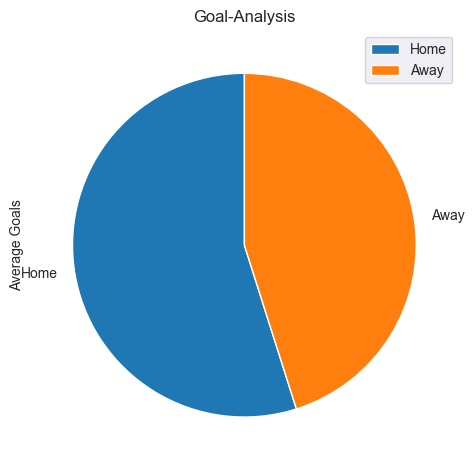

In [12]:
# Plotten der Statistik
plt.figure(figsize = (6,6))
Goals_Analysis.plot(
    kind="pie",
    startangle = 90,
    subplots = True,
    color=["red", "green"],
)
plt.title("Goal-Analysis")
plt.tight_layout()
plt.show()

In [13]:
# Als nächstes Interessiert mich, welche Mannschaft zuhause am Besten war
def Beste_Heimmanschaft(matches_cleaned):
    # Auswahl der Spalten & VOrbereitung für die Berechnung der Punkte
    matches_analysis = matches_cleaned[["Team_Home","Team_Away","Goals_Home","Goals_Away"]].copy()
    matches_analysis["Difference"] = matches_analysis["Goals_Home"] - matches_analysis["Goals_Away"]
    matches_analysis["Points_Home"] = matches_analysis["Difference"].apply(lambda x: 3 if x > 0 else (1 if x == 0 else 0))
    matches_analysis["Points_Away"] = matches_analysis["Difference"].apply(lambda x: 3 if x < 0 else (1 if x == 0 else 0))
    matches_analysis["Result_Home"] = matches_analysis["Difference"].apply(lambda x: "W" if x > 0 else ("D" if x == 0 else "L"))
    matches_analysis["Results_Away"] = matches_analysis["Difference"].apply(lambda x: "W" if x < 0 else ("D" if x == 0 else "L"))

    # Weiterführung der Auswertung für die Heimmannschaften
    home_stats = matches_analysis.groupby("Team_Home").agg(
        Games=("Goals_Home","count"),
        Wins=("Points_Home",lambda x: (x==3).sum()),
        Draws=("Points_Home", lambda x: (x==1).sum()),
        Losses=("Points_Home",lambda x: (x==0).sum()),
        GF=("Goals_Home", "sum"),
        GA=("Goals_Away", "sum"),
        Points=("Points_Home", "sum"),
    ).rename_axis("Team").reset_index()

    home_stats.sort_values("Points", ascending=False, inplace=True)
    home_stats = home_stats[["Team","Points"]]
    return home_stats

BH = Beste_Heimmanschaft(matches_cleaned)
BH


,Team,Points
10,Liverpool,48
12,Manchester City,47
0,Arsenal,47
1,Aston Villa,40
14,Newcastle United,40
17,Tottenham,39
6,Chelsea,37
13,Manchester United,33
4,Brighton,30
18,West Ham,29


In [14]:
# Das gleiche nochmal für die Auswärtsmannschaften (Frage: wer spielt auswärts am besten?)
def Beste_Auswaertsmannschaft(matches_cleaned):
    matches_analysis = matches_cleaned[["Team_Home","Team_Away","Goals_Home","Goals_Away"]].copy()
    matches_analysis["Difference"] = matches_analysis["Goals_Home"] - matches_analysis["Goals_Away"]
    matches_analysis["Points_Home"] = matches_analysis["Difference"].apply(lambda x: 3 if x > 0 else (1 if x == 0 else 0))
    matches_analysis["Points_Away"] = matches_analysis["Difference"].apply(lambda x: 3 if x < 0 else (1 if x == 0 else 0))
    matches_analysis["Result_Home"] = matches_analysis["Difference"].apply(lambda x: "W" if x > 0 else ("D" if x == 0 else "L"))
    matches_analysis["Results_Away"] = matches_analysis["Difference"].apply(lambda x: "W" if x < 0 else ("D" if x == 0 else "L"))

    away_stats = matches_analysis.groupby("Team_Away").agg(
        Games=("Goals_Away", "count"),
        Wins=("Points_Away", lambda x: (x==3).sum()),
        Draws=("Points_Away", lambda x: (x==1).sum()),
        Losses=("Points_Away",lambda x: (x==0).sum()),
        GF=("Goals_Away", "sum"),
        GA=("Goals_Home", "sum"),
        Points=("Points_Away", "sum"),
    ).rename_axis("Team").reset_index()

    away_stats.sort_values("Points", ascending=False, inplace=True)
    away_stats = away_stats[["Team","Points"]]
    return away_stats

BA = Beste_Auswaertsmannschaft(matches_cleaned)
BA


,Team,Points
12,Manchester City,44
0,Arsenal,42
10,Liverpool,34
1,Aston Villa,28
17,Tottenham,27
13,Manchester United,27
6,Chelsea,26
18,West Ham,23
7,Crystal Palace,21
2,Bournemouth,21


In [15]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Teams')

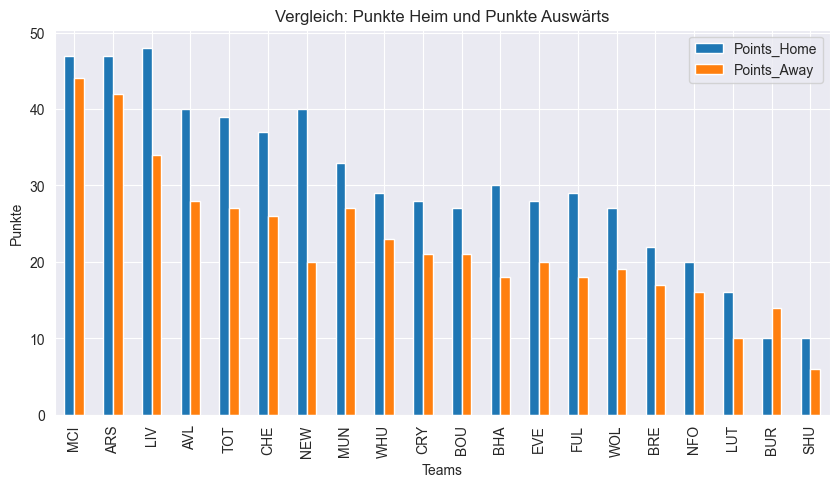

In [16]:
# Grafische Aufbereitung des Unterschieds der Heim- und Auswärtsleistung
# Merging der beiden Tabellen
HuA = pd.merge(BH,BA,on="Team", suffixes=("_Home", "_Away"))
# Um die Grafische Gestaltung schöner zu ermöglichen, füge ich für jeden Verein ein Kürzel hinzu.
team_kuerzel = {
    "Liverpool": "LIV",
    "Manchester City": "MCI",
    "Arsenal": "ARS",
    "Aston Villa": "AVL",
    "Newcastle United": "NEW",
    "Tottenham": "TOT",
    "Chelsea": "CHE",
    "Manchester United": "MUN",
    "Brighton": "BHA",
    "West Ham": "WHU",
    "Fulham": "FUL",
    "Crystal Palace": "CRY",
    "Everton": "EVE",
    "Wolverhampton": "WOL",
    "Bournemouth": "BOU",
    "Brentford": "BRE",
    "Nottingham Forest": "NFO",
    "Luton Town": "LUT",
    "Sheffield": "SHU",
    "Burnley": "BUR",
}
HuA["Kuerzel"] = HuA["Team"].map(team_kuerzel)
HuA["Points_Total"] = HuA["Points_Home"] + HuA["Points_Away"]
HuA = HuA.sort_values(by="Points_Total", ascending=False)

#Jetzt geht es an die Grafische Aufbereitung
HuA.plot(x="Kuerzel", y=["Points_Home","Points_Away"], kind="bar", figsize=(10,5))
plt.title("Vergleich: Punkte Heim und Punkte Auswärts")
plt.ylabel("Punkte")
plt.xlabel("Teams")



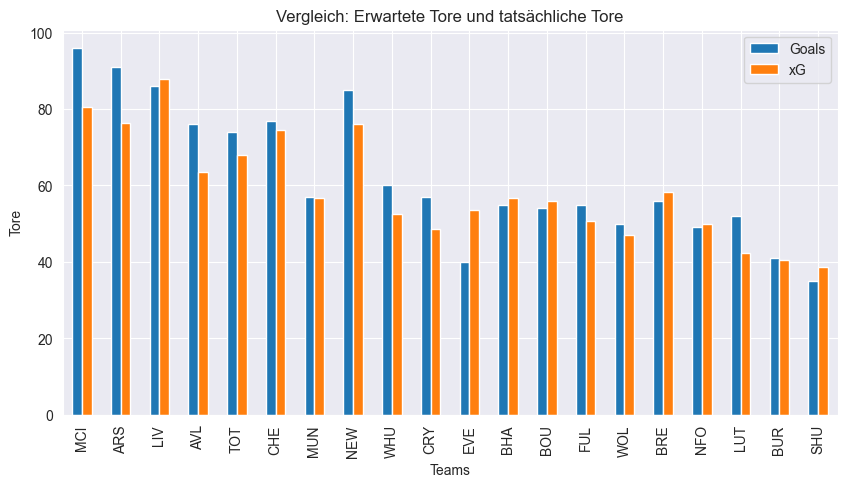

In [17]:
#Grafische Darstellung des Unterschieds der Expected Goals und den tatsächlichen Toren
merged_table = pd.merge(finale_tabelle, erwartete_tabelle, on="Team", how="left")
merged_table = merged_table[["Team","Goals_x","Goals_y","Goals_Against_x","Goals_Against_y"]]
merged_table.columns = ["Team","Goals","xG","Goals_Against","xG_Against"]
merged_table["xG_Difference"] = merged_table["Goals"] - merged_table["xG"]
merged_table["xG_Against_Difference"] = merged_table["Goals_Against"] - merged_table["xG_Against"]

#Erneutes Umbenennen für die grafische Gestaltung
team_kuerzel = {
    "Liverpool": "LIV",
    "Manchester City": "MCI",
    "Arsenal": "ARS",
    "Aston Villa": "AVL",
    "Newcastle United": "NEW",
    "Tottenham": "TOT",
    "Chelsea": "CHE",
    "Manchester United": "MUN",
    "Brighton": "BHA",
    "West Ham": "WHU",
    "Fulham": "FUL",
    "Crystal Palace": "CRY",
    "Everton": "EVE",
    "Wolverhampton": "WOL",
    "Bournemouth": "BOU",
    "Brentford": "BRE",
    "Nottingham Forest": "NFO",
    "Luton Town": "LUT",
    "Sheffield": "SHU",
    "Burnley": "BUR",
}

merged_table["Kuerzel"] = merged_table["Team"].map(team_kuerzel)

#Grafische Aufbereitung
merged_table.plot(x="Kuerzel", y=["Goals","xG"], kind="bar", figsize=(10,5))
plt.title("Vergleich: Erwartete Tore und tatsächliche Tore")
plt.ylabel("Tore")
plt.xlabel("Teams")
plt.show()

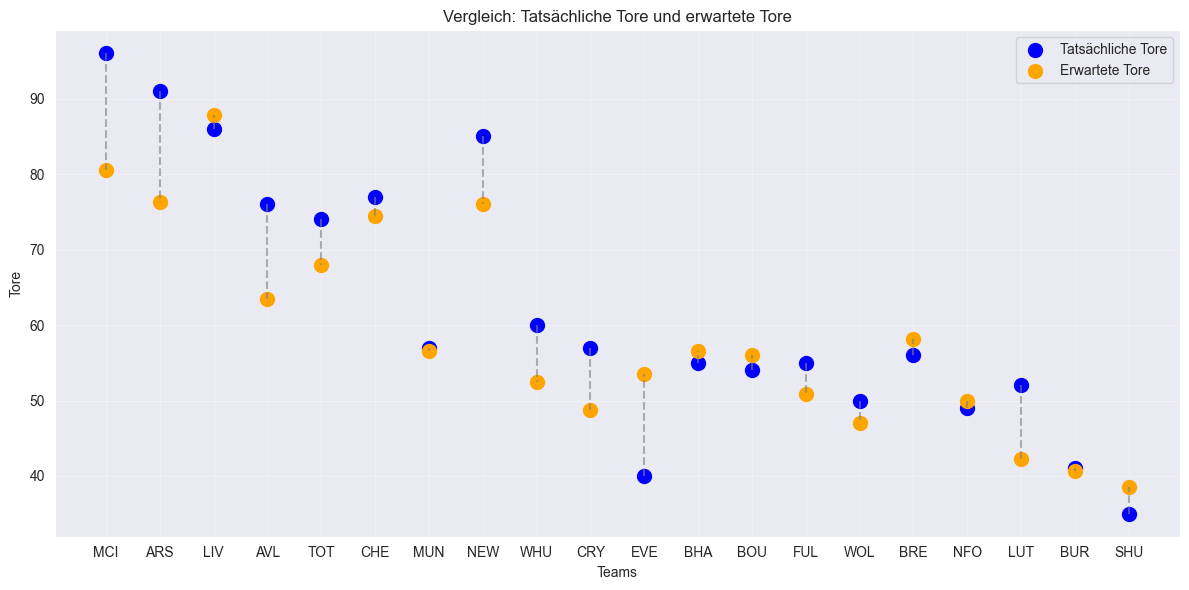

In [18]:
# Neue Version von dem Plot (damit es ersichtlicher wird, was ausgesagt werden will)
teams = merged_table["Kuerzel"]
plt.figure(figsize=(12,6))
plt.scatter(teams,merged_table["Goals"], color = "blue", s=100)
plt.scatter(teams,merged_table["xG"], color = "orange", s=100)

for i, teams in enumerate(teams):
    plt.plot([teams, teams], [merged_table["Goals"][i], merged_table["xG"][i]], color="grey", linestyle="dashed", alpha=0.6)

plt.title("Vergleich: Tatsächliche Tore und erwartete Tore")
plt.ylabel("Tore")
plt.xlabel("Teams")
plt.legend(["Tatsächliche Tore","Erwartete Tore"])
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

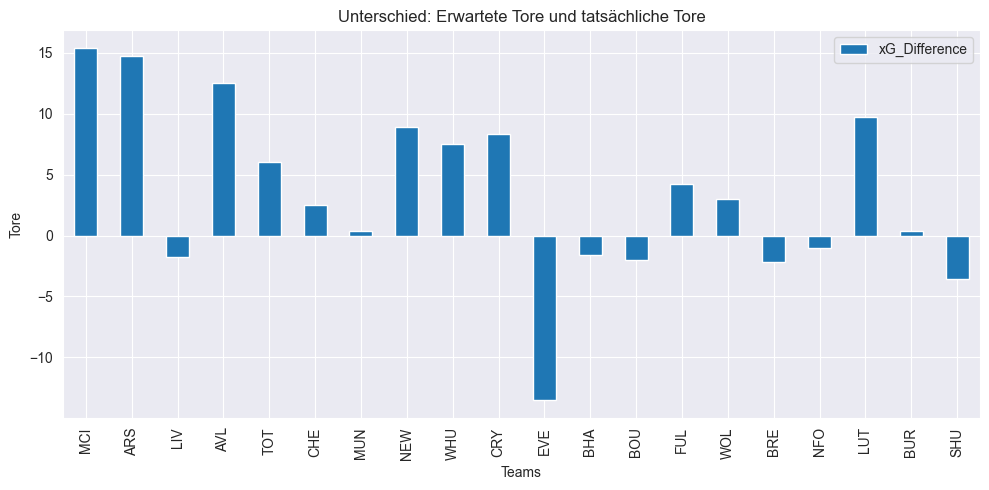

In [19]:
#Plot der xG-Difference
merged_table.plot(x="Kuerzel", y=["xG_Difference"], kind="bar", figsize=(10,5))
plt.title("Unterschied: Erwartete Tore und tatsächliche Tore")
plt.ylabel("Tore")
plt.xlabel("Teams")
plt.tight_layout()
plt.show()

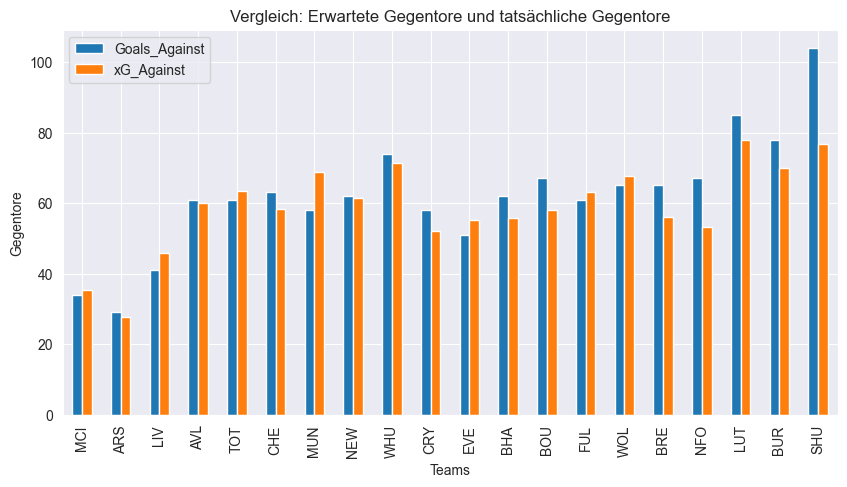

In [20]:
#Hier kommen ncch die erwarteten Gegentore und tatäschliche Gegentore
merged_table.plot(x="Kuerzel", y=["Goals_Against","xG_Against"], kind="bar", figsize=(10,5))
plt.title("Vergleich: Erwartete Gegentore und tatsächliche Gegentore")
plt.ylabel("Gegentore")
plt.xlabel("Teams")
plt.show()

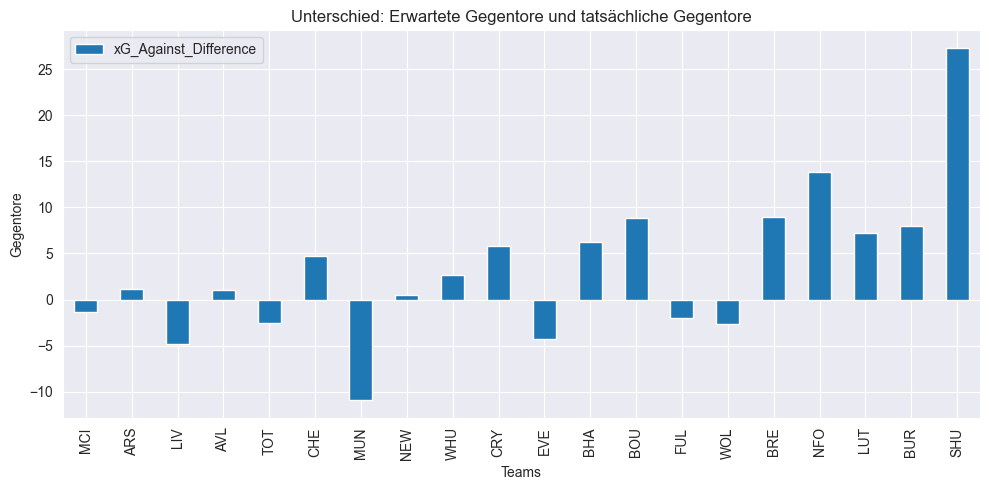

In [21]:
#Plot der xG-Gegentore Differenz
merged_table.plot(x="Kuerzel", y=["xG_Against_Difference"], kind="bar", figsize=(10,5))
plt.title("Unterschied: Erwartete Gegentore und tatsächliche Gegentore")
plt.ylabel("Gegentore")
plt.xlabel("Teams")
plt.tight_layout()
plt.show()

In [22]:
# Wie groß ist der Unterschied der erzielten Punkte der Teams

punktevergleich = pd.merge(finale_tabelle,erwartete_tabelle, on="Team", how="left")
punktevergleich = punktevergleich[["Team","Points_x","Points_y"]]
punktevergleich.columns = ["Team","Points","xG_Points"]
punktevergleich["Point Difference"] = punktevergleich["Points"]-punktevergleich["xG_Points"]
punktevergleich

,Team,Points,xG_Points,Point Difference
0,Manchester City,91,98,-7
1,Arsenal,89,93,-4
2,Liverpool,82,91,-9
3,Aston Villa,68,59,9
4,Tottenham,66,61,5
5,Chelsea,63,77,-14
6,Manchester United,60,40,20
7,Newcastle United,60,68,-8
8,West Ham,52,45,7
9,Crystal Palace,49,51,-2


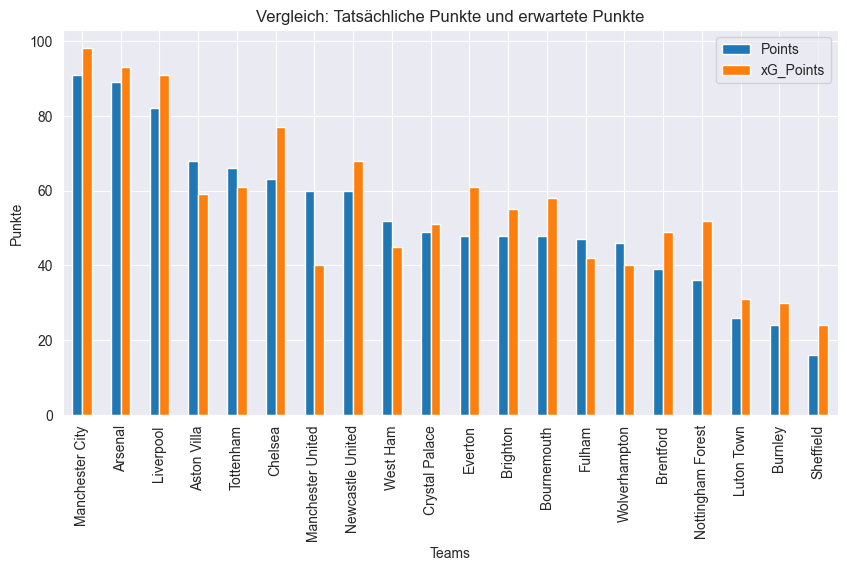

In [23]:
#Hier kommen ncch die erwarteten Punkte und tatäschliche Punkte
punktevergleich.plot(x="Team", y=["Points","xG_Points"], kind="bar", figsize=(10,5))
plt.title("Vergleich: Tatsächliche Punkte und erwartete Punkte")
plt.ylabel("Punkte")
plt.xlabel("Teams")
plt.show()

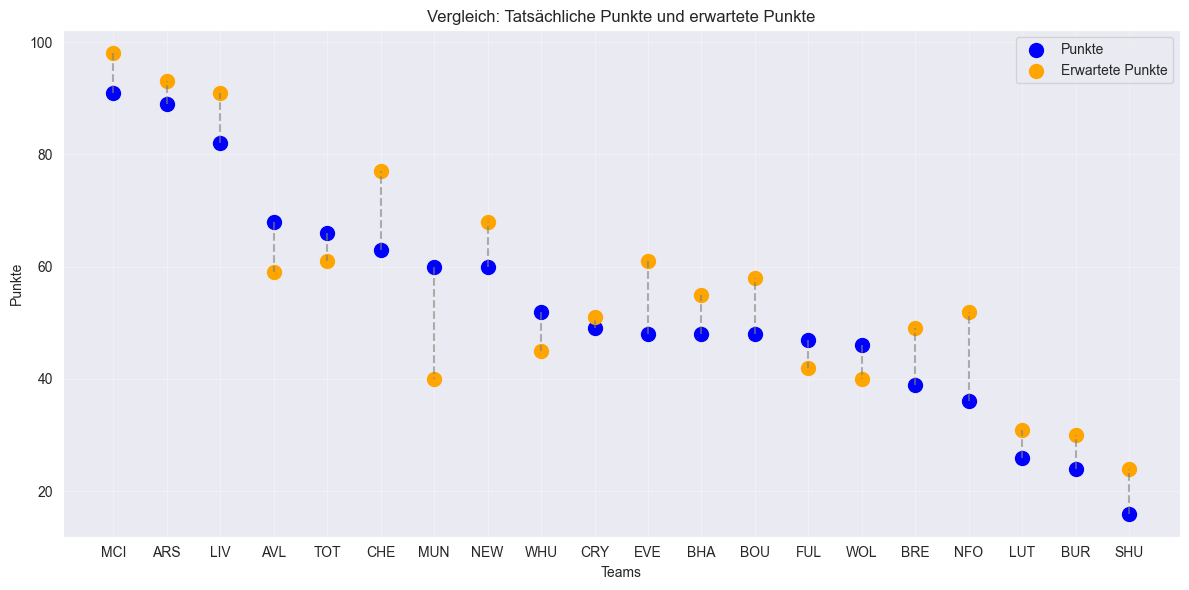

In [24]:
# Neue Version von dem Plot - ebenso für bessere Ersichtlichkeit
punktevergleich["Kürzel"] = punktevergleich["Team"].map(team_kuerzel)
teams = punktevergleich["Kürzel"]
plt.figure(figsize=(12,6))
plt.scatter(teams,punktevergleich["Points"], color = "blue", s=100)
plt.scatter(teams,punktevergleich["xG_Points"], color = "orange", s=100)

for i, teams in enumerate(teams):
    plt.plot([teams, teams], [punktevergleich["Points"][i], punktevergleich["xG_Points"][i]], color="grey", linestyle="dashed", alpha=0.6)

plt.title("Vergleich: Tatsächliche Punkte und erwartete Punkte")
plt.ylabel("Punkte")
plt.xlabel("Teams")
plt.legend(["Punkte","Erwartete Punkte"])
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

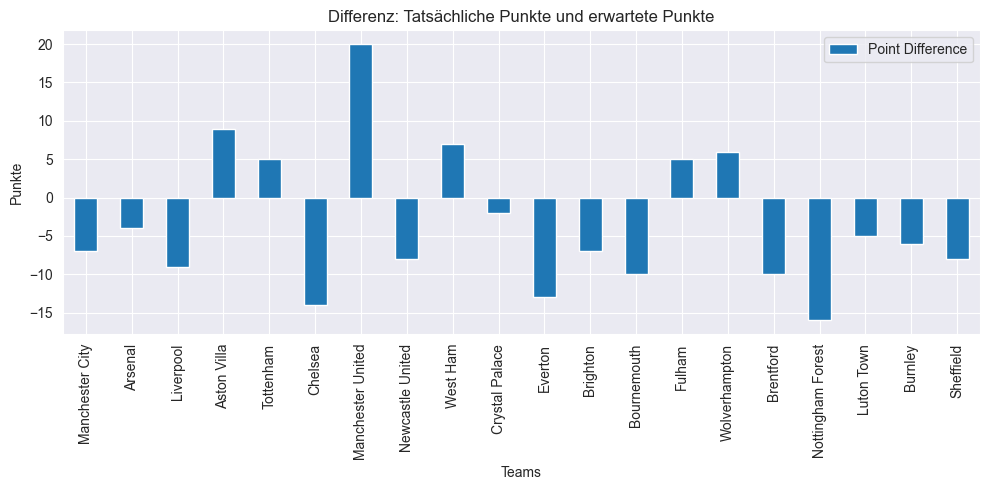

In [25]:
#Plot der Punktedifferenz
# Verein xy hat z Punkte mehr/weniger gemacht, als von ihm erwartet wurde
punktevergleich.plot(x="Team", y=["Point Difference"], kind="bar", figsize=(10,5))
plt.title("Differenz: Tatsächliche Punkte und erwartete Punkte")
plt.ylabel("Punkte")
plt.xlabel("Teams")
plt.tight_layout()
plt.show()

In [26]:
# Wie groß ist der Unterschied der Positionen der Klubs in der normalen Tabelle und der xG_Tabelle
# Auswahl der Position aus der realen Tabelle
erwartete_tabelle_inkl_position = erwartete_tabelle.copy()
erwartete_tabelle_inkl_position["Position"] = range(1,21)
# Auswahl der Position auf der erwarteten Tabelle
finale_tabelle_inkl_position = finale_tabelle.copy()
finale_tabelle_inkl_position["Position"] = range(1,21)
# Erstellung einer Vergleichstabelle um zu sehen, welche Mannschaft besser/schlechter Performed hat als auf Basis der Datenlage
positionsvergleich = pd.merge(finale_tabelle_inkl_position,erwartete_tabelle_inkl_position, on="Team", how="left")
positionsvergleich = positionsvergleich[["Team","Position_x","Position_y"]]
positionsvergleich.columns = ["Team","Position","Position_xG"]
positionsvergleich["Unterschied"] = positionsvergleich["Position_xG"] - positionsvergleich["Position"]
positionsvergleich

,Team,Position,Position_xG,Unterschied
0,Manchester City,1,1,0
1,Arsenal,2,2,0
2,Liverpool,3,3,0
3,Aston Villa,4,8,4
4,Tottenham,5,7,2
5,Chelsea,6,4,-2
6,Manchester United,7,17,10
7,Newcastle United,8,5,-3
8,West Ham,9,14,5
9,Crystal Palace,10,12,2


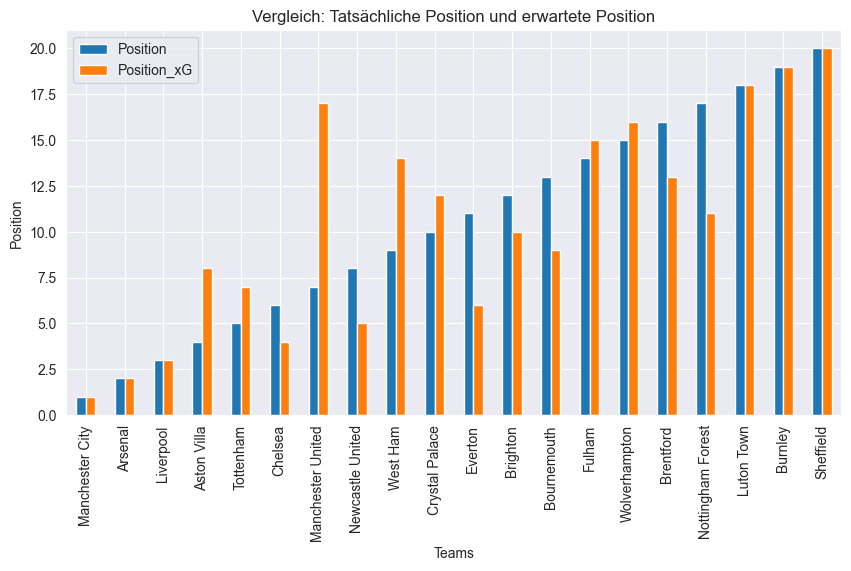

In [27]:
#Unterschied Position und erwartete Position
positionsvergleich.plot(x="Team", y=["Position","Position_xG"], kind="bar", figsize=(10,5))
plt.title("Vergleich: Tatsächliche Position und erwartete Position")
plt.ylabel("Position")
plt.xlabel("Teams")
plt.show()

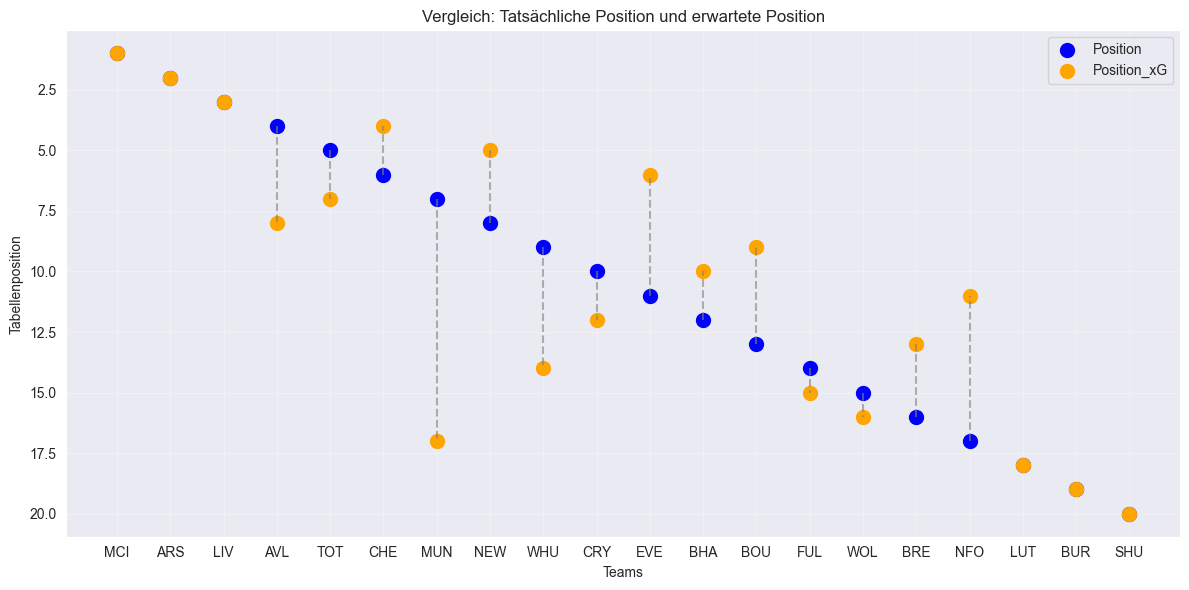

In [28]:
# Neue Version von dem Plot - aus Ersichtlichkeitsgründen
positionsvergleich["Kürzel"] = positionsvergleich["Team"].map(team_kuerzel)
teams = positionsvergleich["Kürzel"]
plt.figure(figsize=(12,6))
plt.scatter(teams,positionsvergleich["Position"], color = "blue", s=100)
plt.scatter(teams,positionsvergleich["Position_xG"], color = "orange", s=100)

#Erstellung der Verbindungslinie
for i, teams in enumerate(teams):
    plt.plot([teams, teams], [positionsvergleich["Position"][i], positionsvergleich["Position_xG"][i]], color="grey", linestyle="dashed", alpha=0.6)

plt.title("Vergleich: Tatsächliche Position und erwartete Position")
plt.ylabel("Tabellenposition")
plt.xlabel("Teams")
plt.gca().invert_yaxis()
plt.legend(["Position","Position_xG"])
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

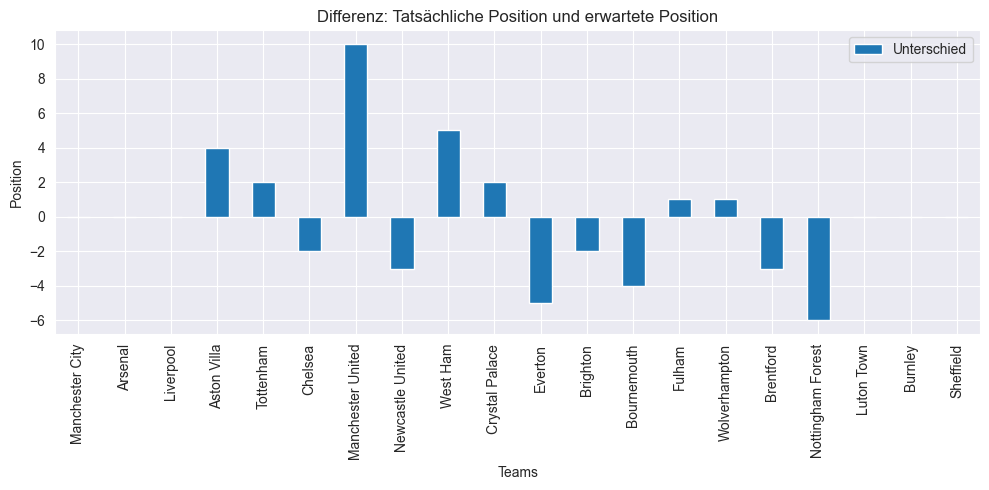

In [29]:
#Plot der Positionsdifferenz
positionsvergleich.plot(x="Team", y=["Unterschied"], kind="bar", figsize=(10,5))
plt.title("Differenz: Tatsächliche Position und erwartete Position")
plt.ylabel("Position")
plt.xlabel("Teams")
plt.tight_layout()
plt.show()

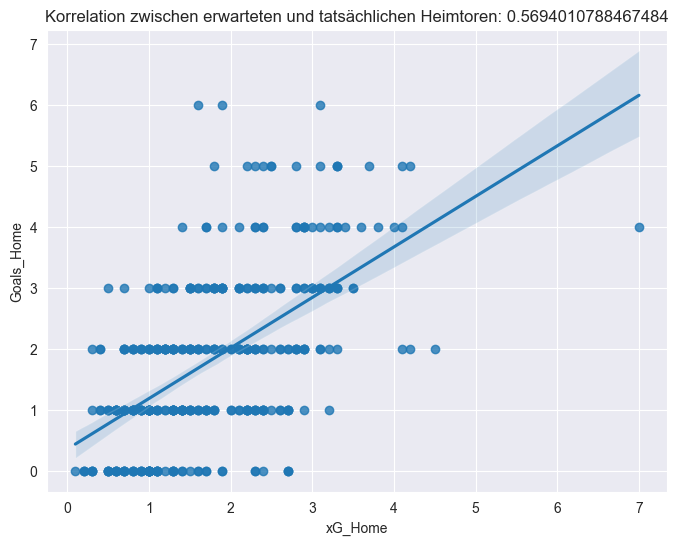

In [30]:
#Korrelationen der erwarteten und tatsächlichen Heimtore
import seaborn as sns
corr_01 = matches_cleaned["Goals_Home"].corr(matches_cleaned["xG_Home"])
plt.figure(figsize=(8,6))
sns.regplot(x=matches_cleaned["xG_Home"], y=matches_cleaned["Goals_Home"])
plt.title(f"Korrelation zwischen erwarteten und tatsächlichen Heimtoren: {corr_01}")
plt.show()

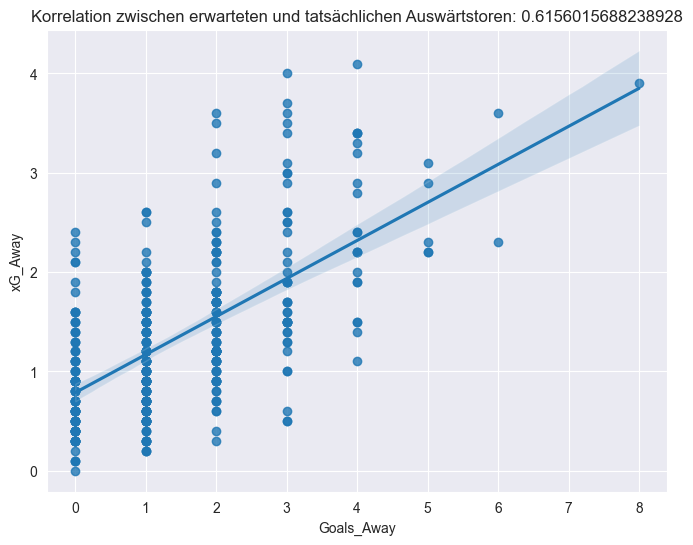

In [31]:
#Korrelation zwischen erwarteten und tatsächlichen Auswärtstoren
corr_02 = matches_cleaned["Goals_Away"].corr(matches_cleaned["xG_Away"])
plt.figure(figsize=(8,6))
sns.regplot(x=matches_cleaned["Goals_Away"], y=matches_cleaned["xG_Away"])
plt.title(f"Korrelation zwischen erwarteten und tatsächlichen Auswärtstoren: {corr_02}")
plt.show()

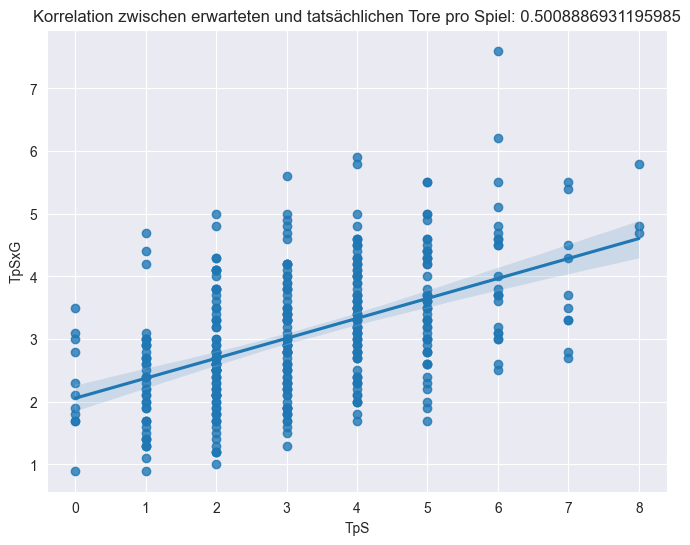

In [32]:
#Korrelation zwischen erwarteten und tatsächlihen Tore pro Spiel
matches_cleaned["TpS"] = matches_cleaned["Goals_Home"] + matches_cleaned["Goals_Away"]
matches_cleaned["TpSxG"] = matches_cleaned["xG_Home"] + matches_cleaned["xG_Away"]

corr_03 = matches_cleaned["TpS"].corr(matches_cleaned["TpSxG"])
plt.figure(figsize=(8,6))
sns.regplot(x=matches_cleaned["TpS"], y=matches_cleaned["TpSxG"])
plt.title(f"Korrelation zwischen erwarteten und tatsächlichen Tore pro Spiel: {corr_03}")
plt.show()

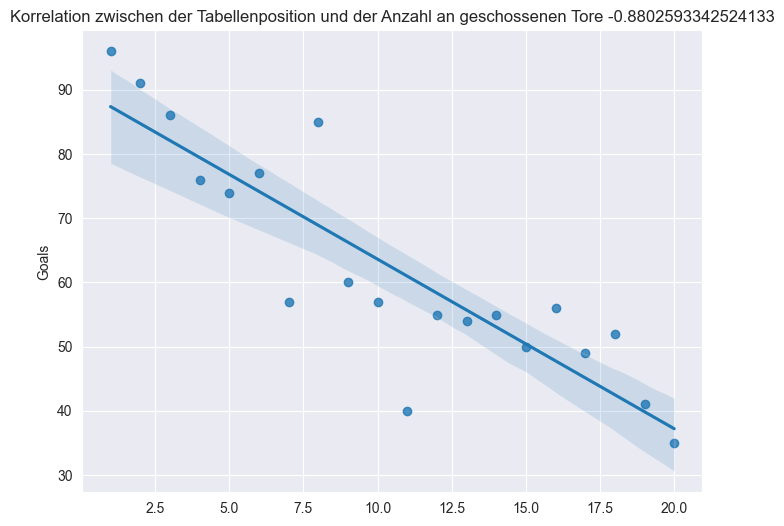

In [33]:
# Korrelation zwischen der Tabellenposition und der Anzahl der Tore
Liste_bis_20 = list(range(1,21))
Liste_bis_20 = pd.Series(Liste_bis_20)

corr_04 = Liste_bis_20.corr(finale_tabelle["Goals"])
plt.figure(figsize=(8,6))
sns.regplot(x=Liste_bis_20, y=finale_tabelle["Goals"])
plt.title(f"Korrelation zwischen der Tabellenposition und der Anzahl an geschossenen Tore {corr_04}")
plt.show()

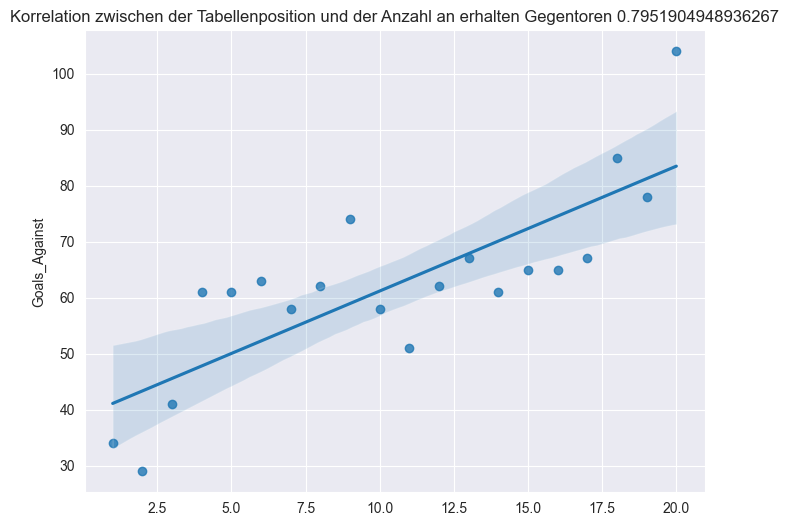

In [34]:
# Korrelation zwischen der Tabellenposition und der Anzahl der Gegentore
Liste_bis_20 = list(range(1,21))
Liste_bis_20 = pd.Series(Liste_bis_20)

corr_05 = Liste_bis_20.corr(finale_tabelle["Goals_Against"])
plt.figure(figsize=(8,6))
sns.regplot(x=Liste_bis_20, y=finale_tabelle["Goals_Against"])
plt.title(f"Korrelation zwischen der Tabellenposition und der Anzahl an erhalten Gegentoren {corr_05}")
plt.show()

In [35]:
# Berechnung der Chancenverwertung jedes Teams.
def Chancenverwertung (matches_cleaned):
    matches_cleaned_analysis = matches_cleaned.copy()
    matches_cleaned_analysis = matches_cleaned_analysis[["Team_Home","Team_Away","Goals_Home","Goals_Away","Shots_Home","Shots_Away","SoT_Home","SoT_Away"]]

    #Aufteilung in Home und Away Stats (so wie bei den Tabellen bereits) und danach berechnen der durchschnittlichen Goal Success Rate
    home_stats = matches_cleaned_analysis.groupby("Team_Home").agg(
        Games = ("Goals_Home","count"),
        Goals_Home = ("Goals_Home", "sum"),
        Shots_Home = ("Shots_Home", "sum"),
        SoT_Home = ("SoT_Home", "sum"),
    ).rename_axis("Team").reset_index()
    away_stats = matches_cleaned_analysis.groupby("Team_Away").agg(
        Games = ("Goals_Away","count"),
        Goals_Away = ("Goals_Away", "sum"),
        Shots_Away = ("Shots_Away", "sum"),
        SoT_Away = ("SoT_Away", "sum"),
    ).rename_axis("Team").reset_index()

    #Merging und Zusammenfassung der Spalten
    tabelle = pd.merge(home_stats, away_stats, on="Team", how="left")
    tabelle["Games"] = tabelle["Games_x"] + tabelle["Games_y"]
    tabelle["Total_Goals"] = tabelle["Goals_Home"] + tabelle["Goals_Away"]
    tabelle["Total_Shots"] = tabelle["Shots_Home"] + tabelle["Shots_Away"]
    tabelle["Total_SoT"] = tabelle["SoT_Home"] + tabelle["SoT_Away"]
    tabelle = tabelle[["Team","Games", "Total_Goals","Total_Shots","Total_SoT"]]

    #Extrahieren von weiteren Statistiken
    tabelle["Goals/Game"] = tabelle["Total_Goals"]/tabelle["Games"]
    tabelle["Shots/Game"] = tabelle["Total_Shots"]/tabelle["Games"]
    tabelle["SoT/Game"] = tabelle["Total_SoT"]/tabelle["Games"]
    tabelle["Goal per Shot"] = tabelle["Total_Goals"]/tabelle["Total_Shots"]
    tabelle["Goal per SoT"] = tabelle["Total_Goals"]/tabelle["Total_SoT"]
    tabelle["SoT per Shot"] = tabelle["Total_SoT"]/tabelle["Total_Shots"]

    return tabelle

shot_statistics = Chancenverwertung(matches_cleaned)
shot_statistics



,Team,Games,Total_Goals,Total_Shots,Total_SoT,Goals/Game,Shots/Game,SoT/Game,Goal per Shot,Goal per SoT,SoT per Shot
0,Arsenal,38,91,647.0,209.0,2.394737,17.026316,5.500000,0.140649,0.435407,0.323029
1,Aston Villa,38,76,511.0,182.0,2.000000,13.447368,4.789474,0.148728,0.417582,0.356164
2,Bournemouth,38,54,539.0,175.0,1.421053,14.184211,4.605263,0.100186,0.308571,0.324675
3,Brentford,38,56,470.0,159.0,1.473684,12.368421,4.184211,0.119149,0.352201,0.338298
4,Brighton,38,55,555.0,198.0,1.447368,14.605263,5.210526,0.099099,0.277778,0.356757
5,Burnley,38,41,430.0,137.0,1.078947,11.315789,3.605263,0.095349,0.299270,0.318605
6,Chelsea,38,77,537.0,194.0,2.026316,14.131579,5.105263,0.143389,0.396907,0.361266
7,Crystal Palace,38,57,452.0,162.0,1.500000,11.894737,4.263158,0.126106,0.351852,0.358407
8,Everton,38,40,504.0,152.0,1.052632,13.263158,4.000000,0.079365,0.263158,0.301587
9,Fulham,38,55,499.0,175.0,1.447368,13.131579,4.605263,0.110220,0.314286,0.350701


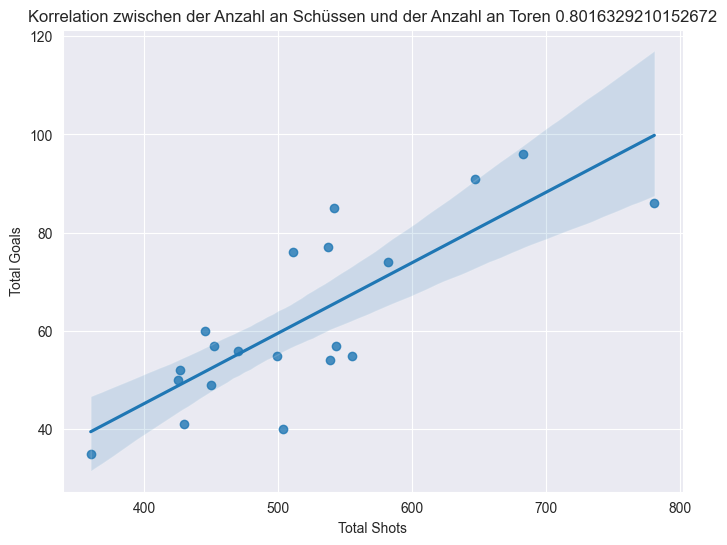

In [36]:
# Berechnen einer Korrelation zwischen der Anzahl an Schüsse und der Anzahl an Toren
corr_06 = shot_statistics["Total_Shots"].corr(shot_statistics["Total_Goals"])
plt.figure(figsize=(8,6))
sns.regplot(x=shot_statistics["Total_Shots"], y=shot_statistics["Total_Goals"])
plt.title(f"Korrelation zwischen der Anzahl an Schüssen und der Anzahl an Toren {corr_06}")
plt.xlabel("Total Shots")
plt.ylabel("Total Goals")
plt.show()

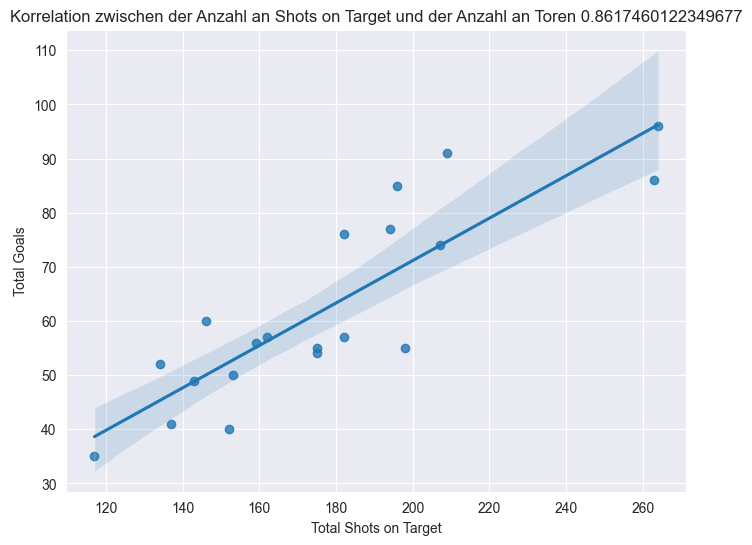

In [37]:
# Berechnen einer Korrelation zwischen der Anzahl an Shots on Target und Toren
corr_07 = shot_statistics["Total_SoT"].corr(shot_statistics["Total_Goals"])
plt.figure(figsize=(8,6))
sns.regplot(x=shot_statistics["Total_SoT"], y=shot_statistics["Total_Goals"])
plt.title(f"Korrelation zwischen der Anzahl an Shots on Target und der Anzahl an Toren {corr_07}")
plt.xlabel("Total Shots on Target")
plt.ylabel("Total Goals")
plt.show()

In [38]:
# Top 5 - Anzahl Tore
shot_statistics = shot_statistics.sort_values("Total_Goals", ascending=False)
shot_statistics[["Team","Total_Goals"]].head()

,Team,Total_Goals
12,Manchester City,96
0,Arsenal,91
10,Liverpool,86
14,Newcastle United,85
6,Chelsea,77


In [39]:
# Top 5 - Anzahl Schüsse
shot_statistics = shot_statistics.sort_values("Total_Shots", ascending=False)
shot_statistics[["Team","Total_Shots"]].head()

,Team,Total_Shots
10,Liverpool,781.0
12,Manchester City,683.0
0,Arsenal,647.0
17,Tottenham,582.0
4,Brighton,555.0


In [40]:
# Top 5 - Anzahl SoT
shot_statistics = shot_statistics.sort_values("Total_SoT", ascending=False)
shot_statistics[["Team","Total_SoT"]].head()

,Team,Total_SoT
12,Manchester City,264.0
10,Liverpool,263.0
0,Arsenal,209.0
17,Tottenham,207.0
4,Brighton,198.0


In [41]:
# Top 5 - Anzahl Goal per Shot
shot_statistics = shot_statistics.sort_values("Goal per Shot", ascending=False)
shot_statistics[["Team","Goal per Shot"]]

,Team,Goal per Shot
14,Newcastle United,0.156827
1,Aston Villa,0.148728
6,Chelsea,0.143389
0,Arsenal,0.140649
12,Manchester City,0.140556
18,West Ham,0.134831
17,Tottenham,0.127148
7,Crystal Palace,0.126106
11,Luton Town,0.121780
3,Brentford,0.119149


In [42]:
# Top 5 - Anzahl Goal per SoT
shot_statistics = shot_statistics.sort_values("Goal per SoT", ascending=False)
shot_statistics[["Team","Goal per SoT"]].head()

,Team,Goal per SoT
0,Arsenal,0.435407
14,Newcastle United,0.433673
1,Aston Villa,0.417582
18,West Ham,0.410959
6,Chelsea,0.396907


In [43]:
# Außerdem interessiert mich eine Elfmeterstatistik - welche Mannschaft hatte die meisten bzw. wie viele % der Gesamttore machten Elfmeter aus?
def Elfmeteranalyse(matches_cleaned):
    matches_cleaned_analysis = matches_cleaned.copy()
    matches_cleaned_analysis = matches_cleaned_analysis[["Team_Home","Team_Away","Goals_Home","Goals_Away","PK_Home","PKatt_Home", "PK_Away", "PKatt_Away"]]

    #Aufteilen in Heim und Auswärts
    home_stats = matches_cleaned_analysis.groupby("Team_Home").agg(
        Games = ("Goals_Home","count"),
        Goals = ("Goals_Home", "sum"),
        Penalties = ("PK_Home", "sum"),
        Penalty_attempts = ("PKatt_Home", "sum"),
    ).rename_axis("Team").reset_index()
    away_stats = matches_cleaned_analysis.groupby("Team_Away").agg(
        Games = ("Goals_Away","count"),
        Goals = ("Goals_Away", "sum"),
        Penalties = ("PK_Away", "sum"),
        Penalty_attempts = ("PKatt_Away", "sum"),
    ).rename_axis("Team").reset_index()
    #Merging der beiden Tabellen
    tabelle = pd.merge(home_stats, away_stats, on="Team", how="left")
    # Auswahl der relevanten Spalten
    tabelle["Games"] = tabelle["Games_x"] + tabelle["Games_y"]
    tabelle["Goals"] = tabelle["Goals_x"] + tabelle["Goals_y"]
    tabelle["Penalties"] = tabelle["Penalties_x"] + tabelle["Penalties_y"]
    tabelle["Penalty_attempts"] = tabelle["Penalty_attempts_x"] + tabelle["Penalty_attempts_y"]

    tabelle = tabelle[["Team","Games","Goals","Penalties","Penalty_attempts"]]
    return tabelle

penalty_statistics = Elfmeteranalyse(matches_cleaned)
penalty_statistics


,Team,Games,Goals,Penalties,Penalty_attempts
0,Arsenal,38,91,10,10
1,Aston Villa,38,76,4,4
2,Bournemouth,38,54,2,3
3,Brentford,38,56,3,3
4,Brighton,38,55,5,6
5,Burnley,38,41,3,3
6,Chelsea,38,77,11,12
7,Crystal Palace,38,57,4,4
8,Everton,38,40,2,3
9,Fulham,38,55,2,2


In [44]:
# Meisten Elfmetertore pro Team
penalty_statistics = penalty_statistics.sort_values("Penalties", ascending=False)
penalty_statistics[["Team","Penalties"]]

,Team,Penalties
6,Chelsea,11
0,Arsenal,10
12,Manchester City,9
14,Newcastle United,8
13,Manchester United,6
10,Liverpool,6
11,Luton Town,5
4,Brighton,5
16,Sheffield,5
7,Crystal Palace,4


In [45]:
# Meiste Elfertore in % von den Total Toren
penalty_statistics["% of Total Goals"] = penalty_statistics["Penalties"]/(penalty_statistics["Goals"])
penalty_statistics = penalty_statistics.sort_values("% of Total Goals", ascending=False)
penalty_statistics[["Team","% of Total Goals"]]

,Team,% of Total Goals
6,Chelsea,0.142857
16,Sheffield,0.142857
0,Arsenal,0.109890
13,Manchester United,0.105263
11,Luton Town,0.096154
14,Newcastle United,0.094118
12,Manchester City,0.093750
4,Brighton,0.090909
19,Wolverhampton,0.080000
5,Burnley,0.073171


In [46]:
# Elfmeter - Genauigkeit
penalty_statistics["% of Penalties Scored"] = penalty_statistics["Penalties"]/(penalty_statistics["Penalty_attempts"])
penalty_statistics = penalty_statistics.sort_values("% of Penalties Scored", ascending=True)
penalty_statistics[["Team","% of Penalties Scored"]]

,Team,% of Penalties Scored
2,Bournemouth,0.666667
8,Everton,0.666667
10,Liverpool,0.666667
18,West Ham,0.800000
4,Brighton,0.833333
13,Manchester United,0.857143
14,Newcastle United,0.888889
12,Manchester City,0.900000
6,Chelsea,0.916667
9,Fulham,1.000000


In [47]:
# Korrelationsanalyse: Ballbesitz und Chancen
matches_cleaned["Poss_Home"].corr(matches_cleaned["Shots_Home"])

0.5353041181045819

In [48]:
matches_cleaned["Poss_Away"].corr(matches_cleaned["Shots_Away"])

0.5258595718073877